In [61]:
# Pegando dados do Banco Central (Sistema Gerenciador de Séries Temporais)

In [62]:
!pip install python-bcb      #Instalando o pacote do BCB
!pip install mplcyberpunk    #Instalando o pacote para construção de gráficos mais elaborados

ERROR: Invalid requirement: '#Instalando'
ERROR: Invalid requirement: '#Instalando'


In [63]:
import mplcyberpunk                #Para construção dos gráficos elaborados

import pandas as pd

from bcb import currency           #Para importar dados de câmbio (currency)
from bcb import sgs                #Para importar as séries temporais (SGS)
from bcb import Expectativas       #Para importar as expectativas de mercado

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick       #Para construir gráficos usando matplotlib (função do python - como a ggplot)
import matplotlib.dates as mdates
from matplotlib.dates import date2num   #Para plotar gráficos de barras com dois valores em uma só data

from datetime import datetime         #Para criar e alterar datas 
from datetime import timedelta

import seaborn as sns

#plt.style.use('cyberpunk')      #Definindo o estilo de plot com o pacote carregado

In [64]:
# Puxando dados da Taxa Selic

In [65]:
juros = sgs.get({'Selic':432}, start = '2010-01-01')

juros

,Selic
Date,
2010-01-01,8.75
2010-01-02,8.75
2010-01-03,8.75
2010-01-04,8.75
2010-01-05,8.75
...,...
2023-08-01,13.75
2023-08-02,13.75
2023-08-03,13.25


In [66]:
# Plotando o gráfico da Selic

C:\Users\andra\AppData\Local\Temp\ipykernel_19172\1092084012.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


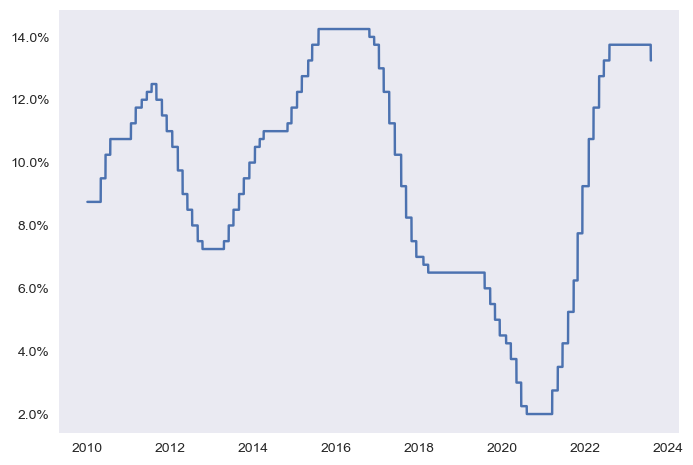

In [67]:
fig, ax = plt.subplots()

plt.style.use('seaborn')

ax.plot(juros.index, juros['Selic'])                        #Plotando a selic
ax.yaxis.set_major_formatter(mtick.PercentFormatter())      #Definindo o formato do eixo y como porcentagem com 'mtick'
ax.grid(False)                                              #Para tirar o grid (quadriculado do gráfico)
 
plt.show()   #Pedindo para mostrar o plot (figura)

In [68]:
# Puxando dados de inflação (IPCA)

In [69]:
hoje = datetime.now()
um_ano_atras = hoje - timedelta(days = 360)     #Definindo objetos de datas (diferença de um ano pros dados)

In [70]:
inflacao = sgs.get({'IPCA':433}, 
                   start = um_ano_atras + timedelta(180))  #Pegando o IPCA dos últimos seis meses

inflacao

,IPCA
Date,
2023-02-01,0.84
2023-03-01,0.71
2023-04-01,0.61
2023-05-01,0.23
2023-06-01,-0.08


In [71]:
# Plotando o gráfico do IPCA mensal

In [72]:
datas_numericas = inflacao.index

C:\Users\andra\AppData\Local\Temp\ipykernel_19172\3337618175.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


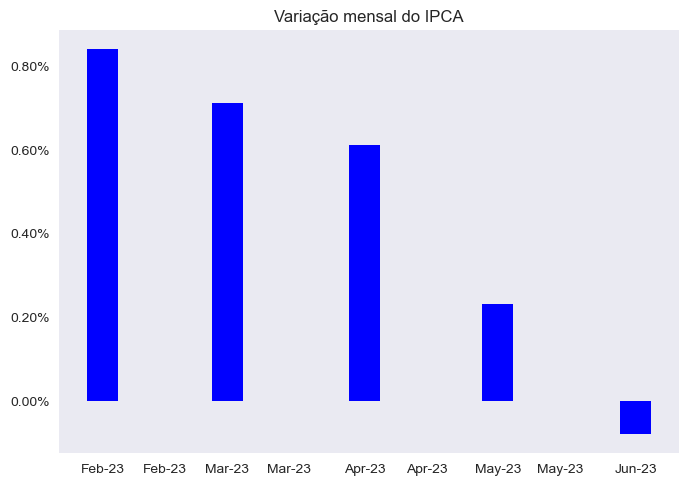

In [73]:
#datas_numericas = date2num(inflacao.index)   #Definindo as datas do gráfico ('date2num' retorna datas do objeto)

fig, ax = plt.subplots()        #Plota os eixos x e y num gráfico vazio7

plt.style.use('seaborn')

ax.bar(datas_numericas, inflacao['IPCA'], label = "IPCA", width = 7, color = 'Blue')   #ax.bar(eixo x, eixo y, label, width)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())                     #Definindo formato de porcentagem do eixo Y

ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')   #Colocando as datas no formato mês-ano
ax.xaxis.set_major_formatter(formato_data)     #Atribuindo no gráfico as datas no formato mês-ano

ax.grid(False)                                 #Removendo o grid 

plt.title('Variação mensal do IPCA')
plt.show()

In [74]:
# Pegando os dados do IPCA mensal do setor de serviços

In [75]:
servicos = sgs.get({'IPCAserv':10844}, 
                   start = um_ano_atras + timedelta(180))

servicos

,IPCAserv
Date,
2023-02-01,1.41
2023-03-01,0.25
2023-04-01,0.52
2023-05-01,-0.06
2023-06-01,0.62


In [76]:
# Plotando o gráfico do IPCA de serviços mensal

C:\Users\andra\AppData\Local\Temp\ipykernel_19172\1095749452.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


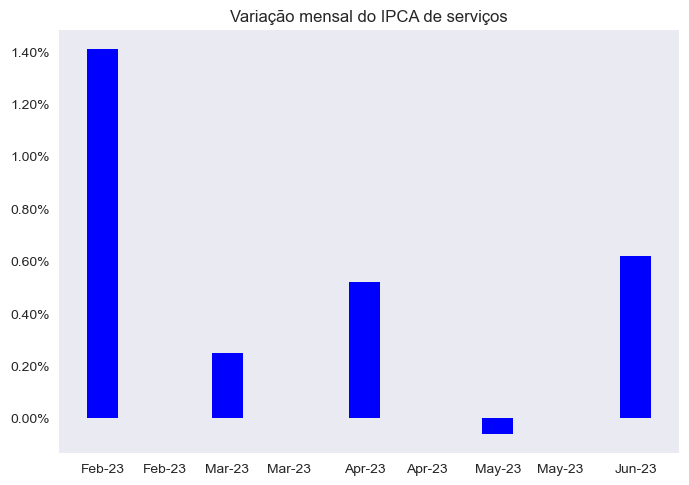

In [77]:
datas_numericas_serv = date2num(servicos.index)   #Definindo as datas do gráfico ('date2num' retorna datas do objeto)

fig, ax = plt.subplots()        #Plota os eixos x e y num gráfico vazio7

plt.style.use('seaborn')

ax.bar(datas_numericas_serv, servicos['IPCAserv'], label = "Serviços", width = 7, color = 'Blue')   #ax.bar(x, y, label, width)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())                              #Definindo formato de porcentagem do eixo Y

ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')   #Colocando as datas no formato mês-ano
ax.xaxis.set_major_formatter(formato_data)     #Atribuindo no gráfico as datas no formato mês-ano

ax.grid(False)                                 #Removendo o grid 

plt.title('Variação mensal do IPCA de serviços')
plt.savefig('servipca.png')
plt.show()

In [78]:
# Pegando os dados do IPCA mensal do setor de alimentação

In [79]:
alimentacao = sgs.get({'IPCAalim':1635}, 
                      start = um_ano_atras + timedelta(180))

alimentacao

,IPCAalim
Date,
2023-02-01,0.16
2023-03-01,0.05
2023-04-01,0.71
2023-05-01,0.16
2023-06-01,-0.66


In [80]:
# Plotando o gráfico do IPCA de alimentação mensal

C:\Users\andra\AppData\Local\Temp\ipykernel_19172\507417433.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


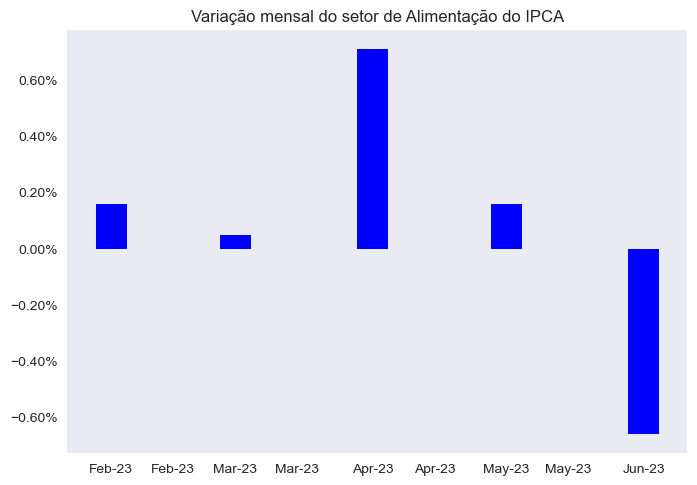

In [81]:
datas_numericas_alim = date2num(alimentacao.index)   #Definindo as datas do gráfico ('date2num' retorna datas do objeto)

fig, ax = plt.subplots()        #Plota os eixos x e y num gráfico vazio7

plt.style.use('seaborn')

ax.bar(datas_numericas_alim, alimentacao['IPCAalim'], label = "Alimentação e Bebidas", width = 7, color = 'Blue')   #ax.bar(x, y, label, width)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())                     #Definindo formato de porcentagem do eixo Y

ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')   #Colocando as datas no formato mês-ano
ax.xaxis.set_major_formatter(formato_data)     #Atribuindo no gráfico as datas no formato mês-ano

ax.grid(False)                                 #Removendo o grid 

plt.title('Variação mensal do setor de Alimentação do IPCA')
plt.show()

In [82]:
# Pegando os dados do IPCA núcleo (headline ex-voláteis) mensal

In [83]:
nucleo = sgs.get({'IPCAnucl':28751}, 
                 start = um_ano_atras + timedelta(180))

nucleo

,IPCAnucl
Date,
2023-02-01,1.02
2023-03-01,0.35
2023-04-01,0.69
2023-05-01,0.40
2023-06-01,0.26


In [84]:
# Plotando o gráfico do IPCA núcleo mensal

C:\Users\andra\AppData\Local\Temp\ipykernel_19172\3642743107.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


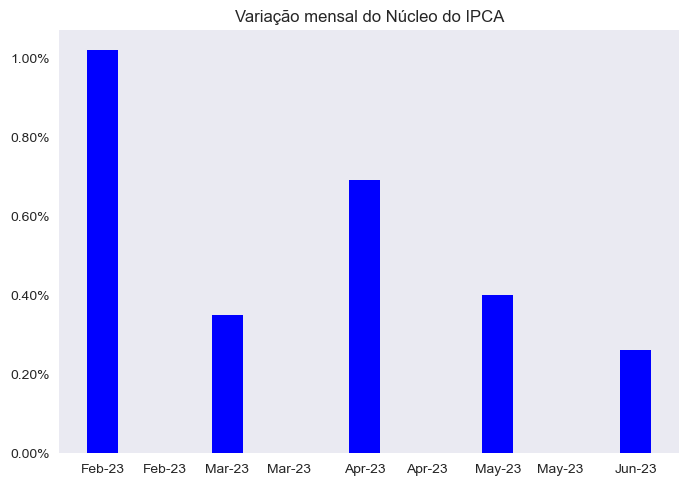

In [85]:
datas_numericas_nucl = date2num(nucleo.index)   #Definindo as datas do gráfico ('date2num' retorna datas do objeto)

fig, ax = plt.subplots()        #Plota os eixos x e y num gráfico vazio7

plt.style.use('seaborn')

ax.bar(datas_numericas_nucl, nucleo['IPCAnucl'], label = "Núcleo", width = 7, color = 'Blue')   #ax.bar(x, y, label, width)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())                     #Definindo formato de porcentagem do eixo Y

ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')   #Colocando as datas no formato mês-ano
ax.xaxis.set_major_formatter(formato_data)     #Atribuindo no gráfico as datas no formato mês-ano

ax.grid(False)                                 #Removendo o grid 

plt.title('Variação mensal do Núcleo do IPCA')
plt.savefig('nucleoipca.png')
plt.show()

In [86]:
# Obtendo as expectativas de mercado através do SGS

In [87]:
em = Expectativas()

em.describe()

em.describe('ExpectativaMercadoMensais')

EntitySets:
  ExpectativasMercadoTop5Anuais
  ExpectativaMercadoMensais
  ExpectativasMercadoInflacao12Meses
  ExpectativasMercadoSelic
  ExpectativasMercadoTop5Selic
  ExpectativasMercadoTop5Mensais
  ExpectativasMercadoTrimestrais
  ExpectativasMercadoAnuais

EntitySet (Endpoint): ExpectativaMercadoMensais
EntityType: br.gov.bcb.olinda.servico.Expectativas.ExpectativaMercadoMensal
Properties: Indicador<str>, Data<str>, DataReferencia<str>, Media<float>, Mediana<float>, DesvioPadrao<float>, Minimo<float>, Maximo<float>, numeroRespondentes<int>, baseCalculo<int>


In [88]:
# Obtendo o endpoint desejado (nesse caso, expectativas de mercado mensais)

In [89]:
ep = em.get_endpoint('ExpectativaMercadoMensais')

In [90]:
# Construindo um dataframe que contenha as expectativas para 03/2023 do IPCA mensal desde o início do período referência

In [91]:
df_jun_23 = (ep.query()
      .filter(ep.Indicador == 'IPCA')
      .filter(ep.Data >= '2022-10-01', ep.Data <= '2023-06-21')
      .filter(ep.baseCalculo == '1')
      .filter(ep.DataReferencia == '06/2023')
      .select(ep.Data, ep.Media, ep.Mediana)
      .orderby(ep.Data.desc())
      .collect())

In [92]:
df_jun_23

,Data,Media,Mediana
0,2023-06-21,-0.0585,-0.0800
1,2023-06-20,-0.0561,-0.0800
2,2023-06-19,-0.0505,-0.0800
3,2023-06-16,-0.0400,-0.0710
4,2023-06-15,0.0474,0.0244
...,...,...,...
174,2022-10-07,0.3042,0.3100
175,2022-10-06,0.3167,0.3100
176,2022-10-05,0.3230,0.3100
177,2022-10-04,0.3208,0.3100


In [93]:
df_jun_23['Data'] = pd.to_datetime(df_jun_23['Data'], format = '%Y/%m/%d', errors = 'coerce')
df_jun_23.set_index('Data', inplace = True)

In [94]:
# Plotando o gráfico da evolução das expectativas do IPCA de março de 2023 (03/2023)

C:\Users\andra\AppData\Local\Temp\ipykernel_19172\2577809332.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


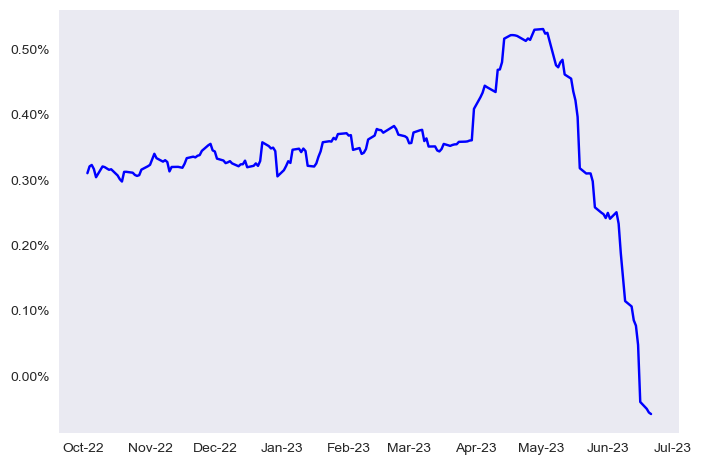

In [95]:
fig, ax = plt.subplots()        #Plota os eixos x e y num gráfico vazio7

plt.style.use('seaborn')

ax.plot(df_jun_23.index, df_jun_23['Media'], color = 'Blue')    #ax.plot(x, y, label, width)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())                     #Definindo formato de porcentagem do eixo Y

ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')   #Colocando as datas no formato mês-ano
ax.xaxis.set_major_formatter(formato_data)     #Atribuindo no gráfico as datas no formato mês-ano

ax.grid(False)                                 #Removendo o grid 

plt.show()

In [96]:
# Construindo um dataframe que contenha as expectativas do IPCA anual de 2024 desde o início do período referência

In [97]:
ep2 = em.get_endpoint('ExpectativasMercadoAnuais')

In [98]:
df_2024 = (ep2.query()
          .filter(ep2.Indicador == 'IPCA')
          .filter(ep2.Data >= '2022-10-01', ep2.Data <= '2023-06-21')
          .filter(ep2.baseCalculo == '1')
          .filter(ep2.DataReferencia == '2024')
          .select(ep2.Data, ep2.Media, ep2.Mediana)
          .orderby(ep2.Data.asc())
          .collect())

df_2024

,Data,Media,Mediana
0,2022-10-03,3.4823,3.4150
1,2022-10-04,3.4825,3.4650
2,2022-10-05,3.4715,3.4300
3,2022-10-06,3.4651,3.4000
4,2022-10-07,3.5108,3.4368
...,...,...,...
174,2023-06-15,4.0320,3.9787
175,2023-06-16,3.9655,3.9649
176,2023-06-19,3.9574,3.9584
177,2023-06-20,3.9570,3.9486


In [99]:
df_2024['Data'] = pd.to_datetime(df_2024['Data'], format = '%Y/%m/%d', errors = 'coerce')
df_2024.set_index('Data', inplace = True)

In [100]:
# Plotando o gráfico da evolução das expectativas do IPCA de 2024

C:\Users\andra\AppData\Local\Temp\ipykernel_19172\4141754649.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


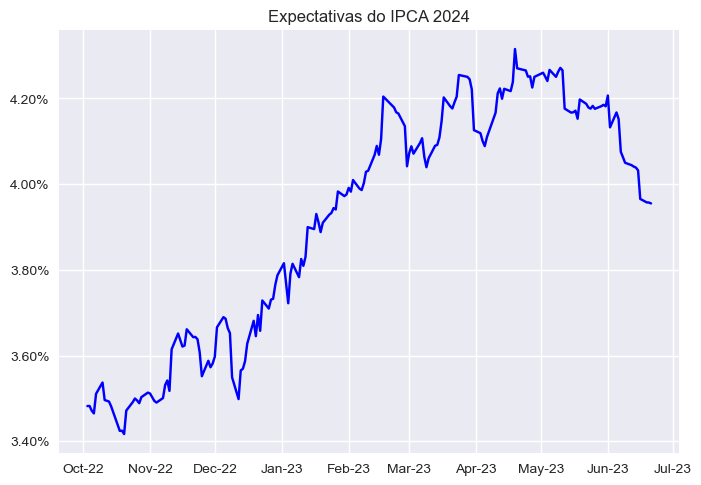

In [101]:
fig, ax = plt.subplots()        #Plota os eixos x e y num gráfico vazio7

plt.style.use('seaborn')

ax.plot(df_2024.index, df_2024['Media'], color = 'Blue')    #ax.plot(x, y, label, width)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())                     #Definindo formato de porcentagem do eixo Y

ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')   #Colocando as datas no formato mês-ano
ax.xaxis.set_major_formatter(formato_data)     #Atribuindo no gráfico as datas no formato mês-ano

plt.title('Expectativas do IPCA 2024')
plt.savefig('expectativas.png')
plt.show()

In [102]:
# Exportando a base de dados para o formato .xlsx

In [103]:
#df_2024.to_excel('ipca2024-2.xlsx')
#servicos.to_excel('servicos.xlsx')
#nucleo.to_excel('nucleo.xlsx')

In [104]:
# Pegando as curvas do DI Futuro (com base de dados do InfoMoney)

In [105]:
di = pd.read_csv('contratos_di_futuro.csv')

di

,Código,Vencimento,Taxa de juros,Variação,Data/Hora do Últ. negócio,Volume negociado,Estimativa para CDI,Decisão Copom
0,DI1M23,01/06/2023,13.654,0.008,22/05/2023 12:14,"137.239,70",13.65168,NaN
1,DI1N23,01/07/2023,13.648,0.006,22/05/2023 02:31,"1.145.206,42",13.66018,Manutenção da taxa
2,DI1Q23,01/08/2023,13.644,0.006,22/05/2023 01:40,"4.993,32",13.63777,NaN
3,DI1U23,01/09/2023,13.610,0.000,22/05/2023 01:35,"6.630,88",13.62690,Manutenção da taxa
4,DI1V23,01/10/2023,13.580,0.015,22/05/2023 02:18,"1.160.437,75",13.59622,Manutenção da taxa
5,DI1X23,01/11/2023,13.530,0.005,22/05/2023 02:02,"3.396,03",13.50161,NaN
6,DI1Z23,01/12/2023,13.430,0.005,22/05/2023 02:29,"108.764,21",13.43688,"Corte de 0,25 ou 0,5p.p."
7,DI1F24,01/01/2024,13.315,0.030,22/05/2023 02:40,"5.881.674,21",NaN,"Corte de 0,5p.p."
8,DI1G24,01/02/2024,13.205,0.015,22/05/2023 01:39,"818,41",NaN,NaN
9,DI1H24,01/03/2024,13.085,0.000,22/05/2023 01:39,"784,81",NaN,NaN


In [106]:
di = di.drop(columns = ['Variação', 'Data/Hora do Últ. negócio', 'Volume negociado', 'Estimativa para CDI'])

di

,Código,Vencimento,Taxa de juros,Decisão Copom
0,DI1M23,01/06/2023,13.654,NaN
1,DI1N23,01/07/2023,13.648,Manutenção da taxa
2,DI1Q23,01/08/2023,13.644,NaN
3,DI1U23,01/09/2023,13.610,Manutenção da taxa
4,DI1V23,01/10/2023,13.580,Manutenção da taxa
5,DI1X23,01/11/2023,13.530,NaN
6,DI1Z23,01/12/2023,13.430,"Corte de 0,25 ou 0,5p.p."
7,DI1F24,01/01/2024,13.315,"Corte de 0,5p.p."
8,DI1G24,01/02/2024,13.205,NaN
9,DI1H24,01/03/2024,13.085,NaN


In [107]:
# Exportando a base de dados para o excel

In [108]:
#di.to_excel('difuturo.xlsx')